### 시도별 화재발생 현황 총괄
 - 행정구역별 총 사망자와 부상자
     * 어느지역이 가장 많은 사망자와 부상자가 있는가
 - 총 피해재산 비율
     * 어느 재산피해 비율이 많이 차지하는가
 - 화재발생 피해액이 2010 ~ 2021년도 까지 증가하였나
 - 행정구역별 화재발생건수와 사망자와부상자의 상관도

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.ticker as ticker

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [font]+current_font_list

df_fire = pd.read_csv('시도별_화재발생_현황_총괄__20230307153319.csv',encoding='cp949')

df_fire['사망 (명)'].unique()
for i , v in enumerate(df_fire['사망 (명)']):
    if '-' in v:
        df_fire['사망 (명)'][i] = 0
print(df_fire['사망 (명)'].unique())

filter1 = df_fire['행정구역별'] != '전국'
data = df_fire[filter1]
df_fire.head()

['304' '263' '267' '307' '325' '253' '306' '345' '369' '285' '365' '276'
 '42' '29' '31' '36' '27' '40' '37' '53' '19' '21' '26' '22' '17' '14' '9'
 '13' '16' '12' '7' '11' '8' '18' '5' '15' '10' '1' '3' '4' '6' '2' '0' 0
 '62' '67' '61' '54' '77' '63' '70' '78' '47' '114' '66' '20' '24' '41'
 '33' '30' '43' '23' '28' '56']


C:\Users\ITPS\AppData\Local\Temp\ipykernel_2816\2160905787.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire['사망 (명)'][i] = 0


,행정구역별,시점,건수 (건),사망 (명),부상 (명),재산피해(계) (천원),부동산 (천원),동산 (천원),이재가구수 (가구),이재민수 (명)
0,전국,2010,41863,304,1588,266776332,117808118,148968214,1183,2623
1,전국,2011,43875,263,1599,256547614,113257928,143289686,1158,2417
2,전국,2012,43249,267,1955,289493719,127500018,161993701,1062,2254
3,전국,2013,40932,307,1877,434462330,178812680,255649650,1354,2330
4,전국,2014,42135,325,1856,405356513,168824616,236531897,1178,2374


C:\Users\ITPS\AppData\Local\Temp\ipykernel_2816\406790821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['부상 (명)'] = pd.to_numeric(data['부상 (명)'])


<AxesSubplot: xlabel='행정구역별', ylabel='부상 (명)'>

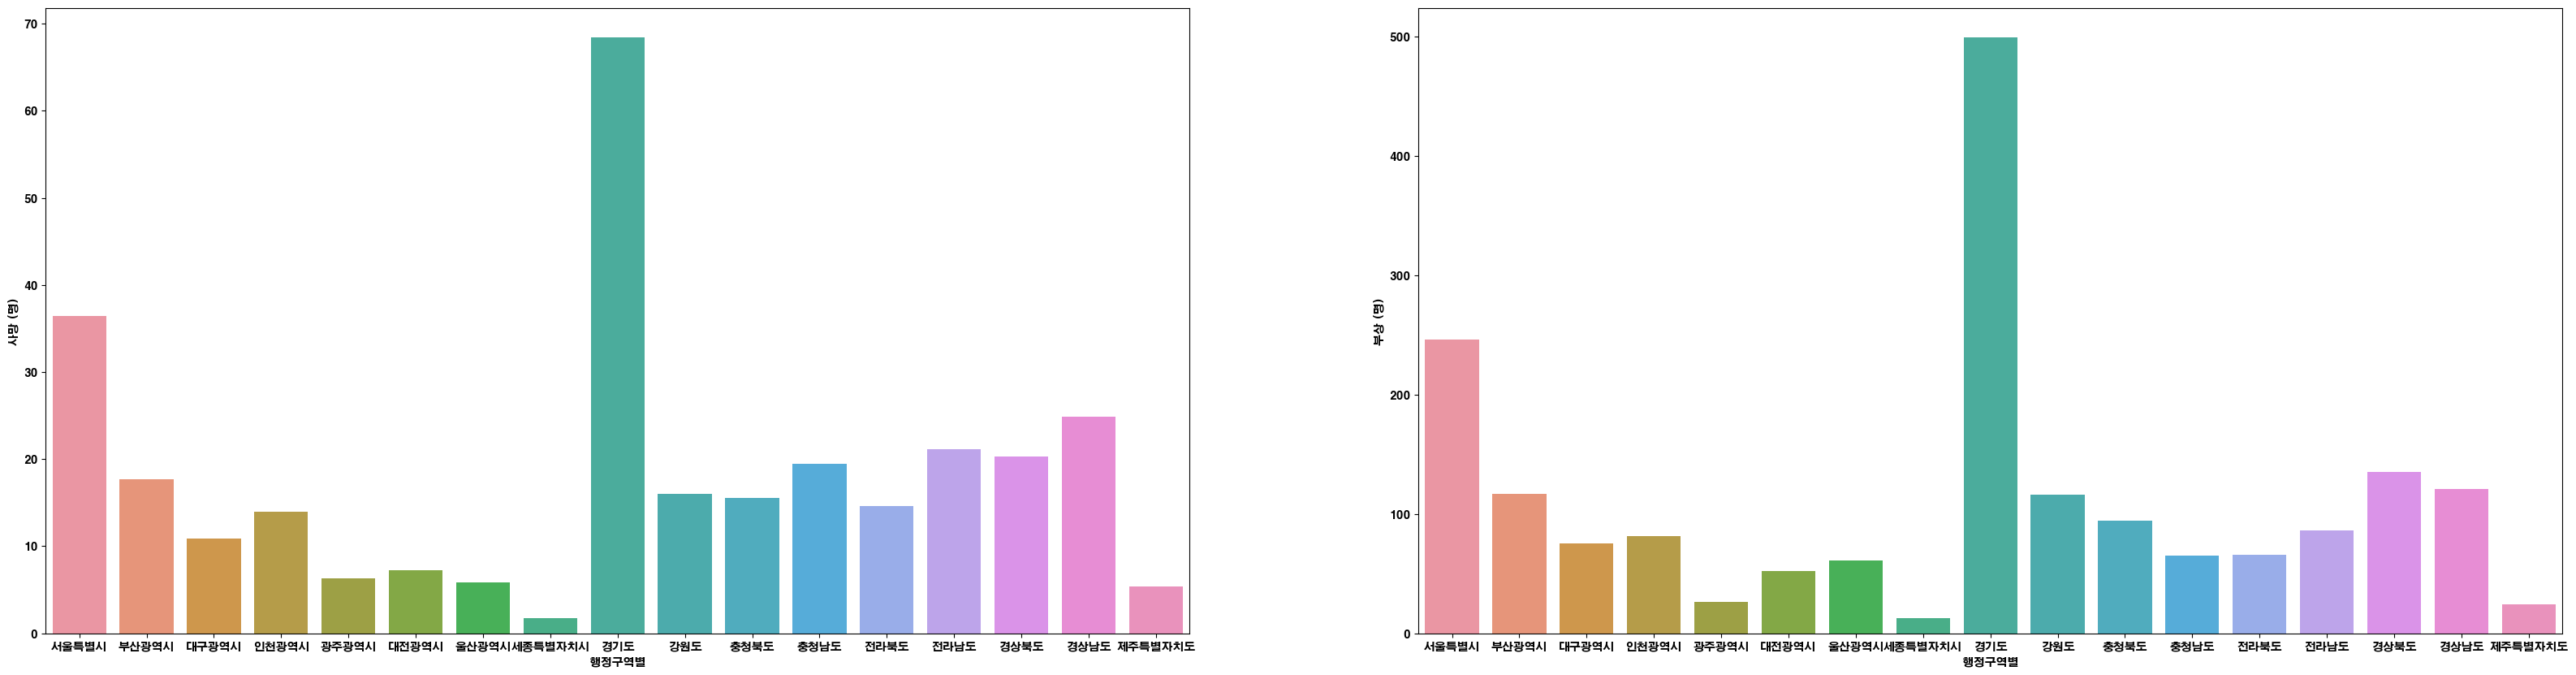

In [104]:
#행정구역별로 총 부상자와 사망자
data_f = data
fig1 = plt.figure(figsize=(20*2,10))
a = fig1.add_subplot(1,2,1)
b = fig1.add_subplot(1,2,2)
data['부상 (명)'] = pd.to_numeric(data['부상 (명)'])
sns.barplot(data=data, x="행정구역별", y="사망 (명)",ax=a,errorbar=None)
sns.barplot(data=data, x="행정구역별", y="부상 (명)",ax=b,errorbar=None)

Text(0.5, 1.0, '전국 총 부동산피해와 재산피해 비율')

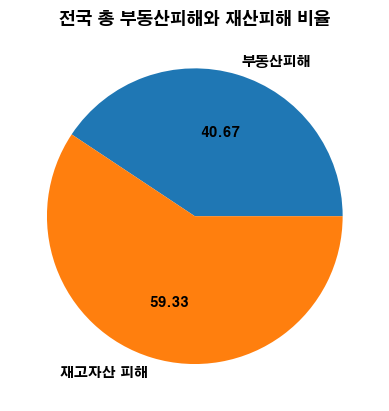

In [3]:
#전국 총 부동산 피해와 재산피해 비율
_,axe = plt.subplots()
filter2 = df_fire['행정구역별'] == '전국'
data2 = df_fire[filter2]
p_damage = data2['부동산 (천원)'].sum()
i_damage = data2['동산 (천원)'].sum()
total_damage = data2['재산피해(계) (천원)'].sum()
p_ratio = p_damage/total_damage
i_ratio = i_damage/total_damage
labels=['부동산피해','재고자산 피해']
sizes=[p_ratio,i_ratio]
axe.pie(sizes,labels=labels,autopct='%.2f')
axe.set_title('전국 총 부동산피해와 재산피해 비율')

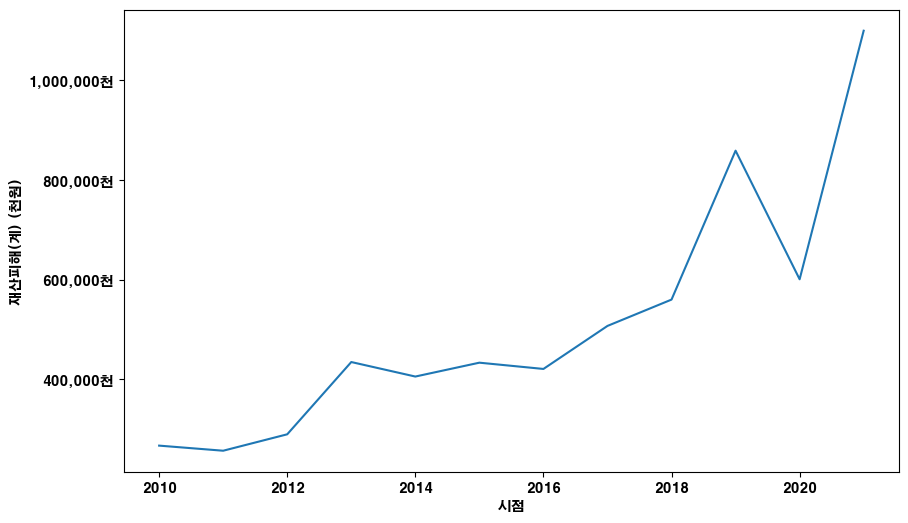

In [131]:
# 화재발생 피해액이 시간이 지날수록 늘어나는가?
plt.figure(figsize=(10,6))
ax=sns.lineplot(data=data2,x='시점',y='재산피해(계) (천원)')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: '{:,.0f}천'.format(x/1000)))

Text(0, 525, '상관도:0.94')

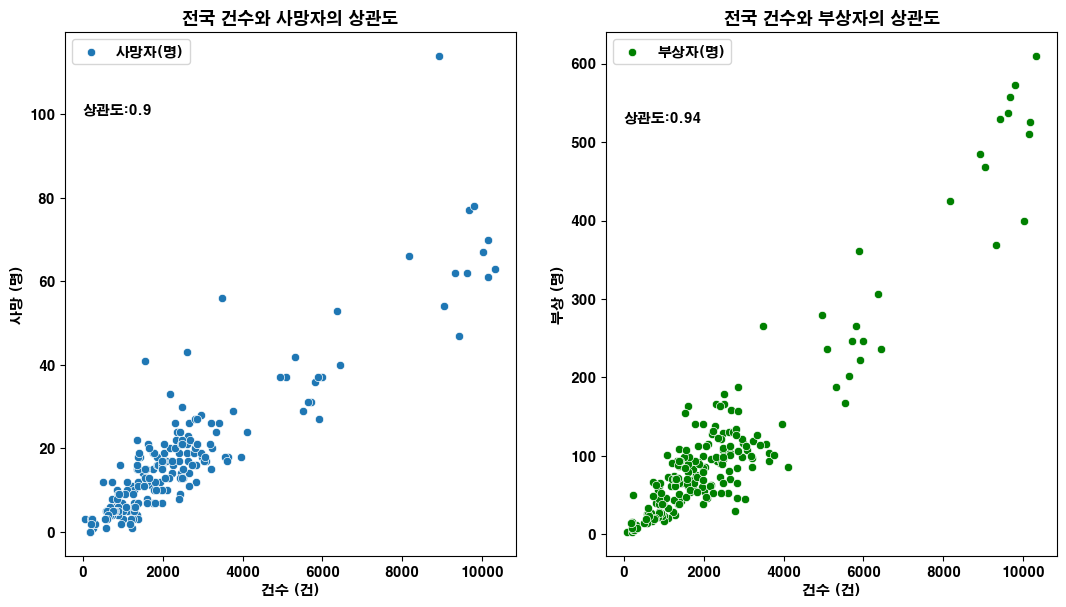

In [126]:
# 행정구역별 화재발생건수와 사망자와부상자의 상관도
fig1 = plt.figure(figsize=(6.4*2,6.8))
a=fig1.add_subplot(1,2,1)
b=fig1.add_subplot(1,2,2)
sns.scatterplot(data=data, x='건수 (건)',y='사망 (명)',ax=a,label='사망자(명)')
sns.scatterplot(data=data, x='건수 (건)',y='부상 (명)',ax=b,color='green',label='부상자(명)')

a.set_title('행정구역별 화재발생건수 건수와 사망자의 상관도')
b.set_title('행정구역별 화재발생건수 건수와 부상자의 상관도')
a.legend()
b.legend()
cor_dead = np.corrcoef(data['건수 (건)'],data['사망 (명)'])[1][0]
cor_wounded = np.corrcoef(data['건수 (건)'],data['부상 (명)'])[1][0]
a.text(0,100,'상관도:{}'.format(round(cor_dead*100)/100 ))
b.text(0,525,'상관도:{}'.format(round(cor_wounded*100)/100 ))
